# Lista 4 - PAA - Fábio Alves de Freitas

[link lista](https://drive.google.com/file/d/1mA6_Na3ixa80IpHBen5oFzztiv9liImP/view)

In [ ]:
import numpy as np
from math import floor, ceil, log

# HUFFMAN BINARY ALPHABET

In [ ]:
class node:
  def __init__(self, character=None, frequency=None, left=None, middle=None, right=None):
    self.character = character
    self.frequency = frequency
    self.left = left
    self.middle = middle
    self.right = right
  
def printBinaryEncoding(tree, encoding=''):
  if tree != None:
    if tree.character != None:
      print('char: {},\tfreq: {},\tencoding: {}'.format(tree.character, tree.frequency, encoding))
    printBinaryEncoding(tree.left,  encoding + '0')
    printBinaryEncoding(tree.right, encoding + '1')

# Extrai o mínimo com custo O(n)
def extractMin(C):
  if C == None:
    return None
  minIndex = 0
  for j in range(0, len(C)):
    if C[j].frequency < C[minIndex].frequency:
      minIndex = j
  return C.pop(minIndex)

def huffman(C):
  Q = C.copy()
  for i in range(0, len(C)-1):
    z = node()
    z.left = x = extractMin(Q)
    z.right = y = extractMin(Q)
    xfreq = x == None if 0 else x.frequency
    yfreq = y == None if 0 else y.frequency
    z.frequency = xfreq + yfreq
    Q.append(z)
  return extractMin(Q)

In [ ]:
C = [node('a', 45), node('b', 13), node('c', 12), node('d', 16), node('e', 9), node('f', 5), node('g', 10)]
tree = huffman(C)
printBinaryEncoding(tree)

char: a,	freq: 45,	encoding: 0
char: b,	freq: 13,	encoding: 100
char: f,	freq: 5,	encoding: 1010
char: e,	freq: 9,	encoding: 1011
char: d,	freq: 16,	encoding: 110
char: g,	freq: 10,	encoding: 1110
char: c,	freq: 12,	encoding: 1111


# TESTES

In [ ]:
#@title Texto de título padrão
def bits(n):
  return n*ceil(log(n,2))

def bits2(n):
  return 2*n-1+n*ceil(log(n,2))

In [ ]:
[(i, bits(i)) for i in range(1,10)]

[(1, 0), (2, 2), (3, 6), (4, 8), (5, 15), (6, 18), (7, 21), (8, 24), (9, 36)]

In [ ]:
[(i, bits2(i)) for i in range(1,10)]

[(1, 0), (2, 2), (3, 6), (4, 8), (5, 15), (6, 18), (7, 21), (8, 24), (9, 36)]

Resposta:

Pela definição da questão, temos que $2n-1$ é o número de bits necessários para especificar a estrutura da árvore. Visto que $|C| = n$, então são necessários pelo menos $\lceil \log_2 n \rceil$ para representar todos os elementos desse conjunto em binário. Desta forma, o número total de bits necessários para representar qualquer código prefixo sobre $C$ será a soma dos bits da árvore ($2n-1$) mais o número de bits sob cada caracter de $C$ ($n{\lceil \log_2 n \rceil}$):

\begin{align*}
2n-1+n{\lceil \log_2 n \rceil}
\end{align*}


# 1º) (Ref. 7436) 

Generalize o algoritmo de Huffman para palavras com alfabeto ternário (por exemplo: 0, 1, 2) e prove que este conduz a um código ternário ótimo. 


Resposta:

De acordo com os lemas 16.2 e 16.3, apresentados e provados no cormen, onde é demonstrado que o algoritmo de huffman apresenta subestrutura ótima e exibe escolha gulosa, sendo correto e retornando uma árvore ótima para um dado alfabeto de símbolos de frequência associadas. 

Podemos generalizar essa abordagem do alfabeto binário (0,1) para um ternário (0,1,2), agrupandos os três elementos de de menor frequência num mesmo nó, contruindo assim uma árvore ternária. 

Para o lema 16.2, dados três caracteres x, y e z de um alfabeto C e com a menor frequência associada, então eles se diferenciariam apenas no último dígito da codificação.

Para o lema 16.3, poderíamos construir os "meta caracteres" de novos alfabeto baseados no C somando a frequência dos três caracteres de menor frequência associada, de modo que o último alfabeto gerado representaria a árvore ternária ótima para a codificação do alfabeto 

In [ ]:
def printTernaryEncoding(tree, encoding=''):
  if tree != None:
    if tree.character != None:
      print('char: {},\tfreq: {},\tencoding: {}'.format(tree.character, tree.frequency, encoding))
    printTernaryEncoding(tree.left,   encoding + '0')
    printTernaryEncoding(tree.middle, encoding + '1')
    printTernaryEncoding(tree.right,  encoding + '2')
    

def huffmanTernary(C):
  Q = C.copy()
  for i in range(0, len(C)-1):
    if len(Q) == 1:
        break
    z = node()
    z.left = l = extractMin(Q)
    z.middle = m = extractMin(Q)
    z.right = r = extractMin(Q)
    lfreq = mfreq = rfreq = 0
    if l != None:
        lfreq = l.frequency
    if m != None:
        mfreq = m.frequency
    if r != None:
        rfreq = r.frequency
    z.frequency = lfreq + mfreq + rfreq
    Q.append(z)
  return extractMin(Q)


In [ ]:
C = [node('a', 45), node('b', 13), node('c', 12), node('d', 16), node('e', 9), node('f', 5), node('g', 10)]
tree = huffmanTernary(C)
printTernaryEncoding(tree)

char: f,	freq: 5,	encoding: 00
char: e,	freq: 9,	encoding: 01
char: g,	freq: 10,	encoding: 02
char: c,	freq: 12,	encoding: 10
char: b,	freq: 13,	encoding: 11
char: d,	freq: 16,	encoding: 12
char: a,	freq: 45,	encoding: 2


# 2º) (Ref. 6436) 

Suponha que temos um código prefixo ótimo sobre um conjunto $C = {0, 1, . . . , n − 1}$ de caracteres e desejamos transmitir este código usando a menor quantidade de bits possível. Mostre como representar qualquer código prefixo sobre $C$ usando somente $2n − 1 + n{\lceil \log_2 n \rceil}^1$. (Sugestão: Use 2n − 1 bits para especificar a estrutura da árvore, que pode ser descoberta por um percurso sobre a árvore.)

# 3º) (Ref. 2443) 

Dada uma matriz $T$ $m \times n$ sobre um dado campo (como os reais, por exemplo), mostre que $(S,\mathcal{I})$ é uma matroide, onde $S$ é o conjunto de colunas de $T$ e $A \in \mathcal{I}$ se e somente se as colunas de $A$ são linearmente independentes. 

Resposta:

Para provar que essa matriz é uma matroide precisamos mostrar que **S é finito**, ela possui a propriedade de **hereditariedade** e que ela possui a propriedade de **troca**.

* **S é finito**: Como a matriz é do tipo $m \times n$, então ela possui n colunas. Visto que $n$ é um número finito, então a primeira propriedade é verdadeira.

* **Hereditariedade**: Se considerarmos A como a conjunto de colunas $(c_1, c_2, ..., c_n)$, então A será linearmente dependenes se existirem escalares $d_1, d_2, ..., d_n$, com nem todos sendo zero, de forma que $\sum_{i=1}^{n}d_i*c_i = 0$. Se adicionarmos mais colunas a A, com escalares iguais a 0 associados a elas, então este novo conjunto ainda será linearmente dependente. Aplicando a contrapositiva, então dado um subconjunto L.I. então seu conjunto também será L.I. Desta forma, a matriz T obedece a propriedade da hereditariedade.

* **Troca**: Suponha que A e B são conjuntos L.I. com $|A| > |B|$. Se nós não pudéssemos adicionar nenhuma coluna de A de modo a preservar sua independencia linear, então cada elemento de A poderia ser escrito como uma combinação linear dos elementos de B. Mas isso implica que B estende-se num espaço vetorial de |A| dimensões, o que é impossível. Desta forma, a independencia linear deve ser satisfeita, e portanto T obedece a propriedade da troca.

Como todas as propriedades acima são verdadeiras, então T é uma matroide.



# 4º) (Ref. 4443) 

Seja S um conjunto finito e sejam $S_1,S_2, ... , S_k$ partições de S compostas por conjuntos disjuntos não vazios. Defina a estrutura $(S,\mathcal{I})$ pela condição que $\mathcal{I} = {A : |A ∩ S_i| ≤ 1, i = 1,2,...,k}$. Mostre que $(S,\mathcal{I})$ é um matriode, ou seja, o conjunto de todos os conjuntos de A que contenham ao menos um elemento de cada subconjunto na partição que determina os conjuntos independentes de um matroide. 

Resposta:

Suponha que $X \subset Y$ e $Y \in \mathcal{I}$. Então $(X \cap S_i) \subset (Y \cap S_i)$ para todo $i$, então

\begin{align*}
|X \cap S_i| \leq |Y \cap S_i| \leq 1
\end{align*}

Para todo $1 \leq i \leq k$. Então $\mathcal{M}$ é fechado sob a inclusão.

Agora sejam $A, B \in \mathcal{I}$ com $|A|=|B|+1$. Então deve existir algum $j$ tal que $|A \cap S_j|=1$ e $|B \cap S_j|=0$. Seja $a=A \cap S_j$. Então $a \ne B$ e $|(B \cup \{a\} \cap s_i)|=1$. Visto que

\begin{align*}
|(B \cup \{a\} \cap s_i)| = |B \cap S_i|
\end{align*}

para toto $i \ne j$, nós devemos ter $B \cup \{a\} \in \mathcal{I}$. Logo \mathcal{M} é uma matroide.

# 5º) (Ref. 1497) 

Mostre o resultado de se inserir as chaves 

F, S, Q, K, C, L, H, T, V, W, M, R, N, O, A, B, X, Y, D, Z, E 

em uma árvore B vazia com grau mínimo igual a 2. Desenhe somente a configuração da árvore B somente antes que um dado nodo seja dividido e a sua configuração final. 

Resposta:

$T = 2$


Adicionando F, S e  Q

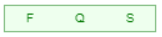

Adicionando K

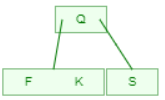

Adicionando C

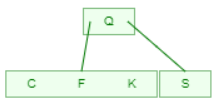

Adicionando L

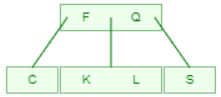

Adicionando H, T e V

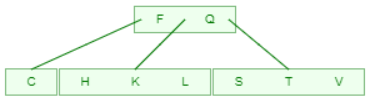

Adicionando W

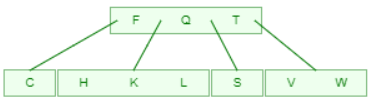

Adicionando M

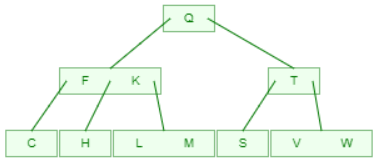

Adicionando R e N

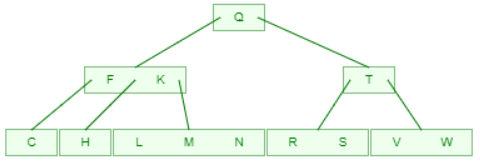

Adicionando O

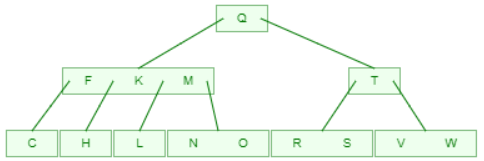

Adicionando A

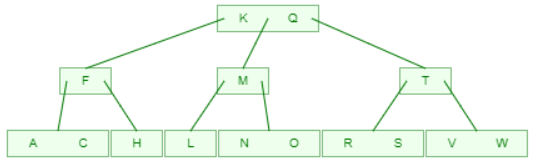

Adicionando B e X

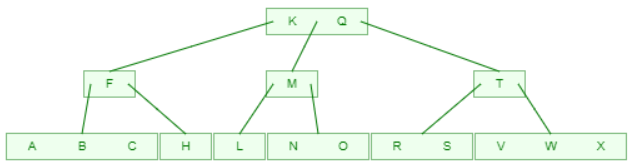

Adicionando Y

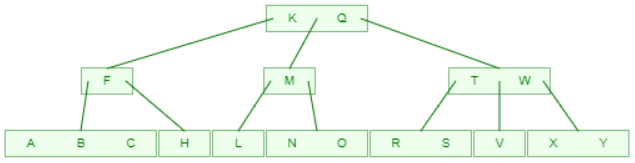

Adicionando D

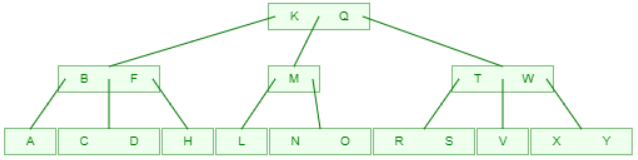

Adicionando Z e E

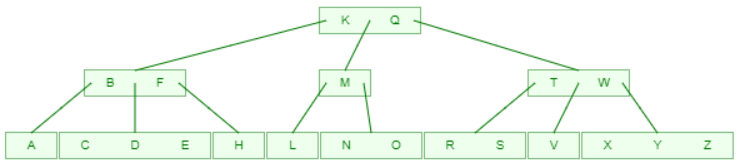






# 6º) (Ref. 2502) 

Escreva o Pseudo Código para a função B-TREE-DELETE. Determine o seu custo. 

### Pseudo-Código



In [ ]:
B-Tree-Delete-Key(x, k)                               #  Custo
		if not leaf[x] then                               # 1
				y ← Preceding-Child(x)                        # 1
				z ← Successor-Child(x)                        # 1
				if n[y] > t − 1 then                          # 1
						k' ← Find-Predecessor-Key(k, x)           # 1
						Move-Key(k', y, x)                        # 1
						Move-Key(k, x, z)                         # 1
						B-Tree-Delete-Key(k, z)                   # log t (n)
				else if n[z] > t − 1 then                     # 1
						k' ← Find-Successor-Key(k, x)             # 1
						Move-Key(k', z, x)                        # 1
						Move-Key(k, x, y)                         # 1
						B-Tree-Delete-Key(k, y)                   # log t (n)
				else                                          # 1
						Move-Key(k, x, y)                         # 1
						Merge-Nodes(y, z)                         # 1
						B-Tree-Delete-Key(k, y)                   # log t (n)
		else (leaf node)                                  # 1
				 y ← Preceding-Child(x)                       # 1
				 z ← Successor-Child(x)                       # 1
				 w ← root(x)                                  # 1
				 v ← RootKey(x)                               # 1
						if n[x] > t − 1 then Remove-Key(k, x)     # 1
						else if n[y] > t − 1 then                 # 1
								k' ← Find-Predecessor-Key(w, v)       # 1
								Move-Key(k', y,w)                     # 1
								k' ← Find-Successor-Key(w, v)         # 1
								Move-Key(k',w, x)                     # 1
								B-Tree-Delete-Key(k, x)               # log t (n)
						else if n[w] > t − 1 then                 # 1
								k' ← Find-Successor-Key(w, v)         # 1
								Move-Key(k', z,w)                     # 1
								k' ← Find-Predecessor-Key(w, v)       # 1
								Move-Key(k',w, x)                     # 1
								B-Tree-Delete-Key(k, x)               # log t (n)
						else                                      # 1
								s ← Find-Sibling(w)                   # 1
								w' ← root(w)                          # 1
										if n[w'] = t − 1 then             # 1
												Merge-Nodes(w',w)             # 1
												Merge-Nodes(w, s)             # 1
												B-Tree-Delete-Key(k, x)       # log t (n)
										else                              # 1
												Move-Key(v,w, x)              # 1
												B-Tree-Delete-Key(k, x)       # log t (n)

### Implementação B-Tree

In [ ]:
class BTreeNode:
    def __init__(self, keys=[], children=[], leaf=False):
        self.keys = keys
        self.children = children
        self.leaf = leaf

class BTree:
    def __init__(self, t, root=BTreeNode(leaf=True)):
        self.t = t
        self.root = root
    
    def print_order(self):
        '''
        imprime no console a árvore em ordem
        (relembrar pré-ordem, ordem e pós-ordem)
        '''
        this_level = [self.root]
        while this_level:
            next_level = []
            output = ""
            for node in this_level:
                if node.children:
                    next_level.extend(node.children)
                output += str(node.keys) + " "
            print(output)
            this_level = next_level
    
    def print_order2(self):
        '''
        imprime no console a árvore em ordem
        (relembrar pré-ordem, ordem e pós-ordem)
        '''
        this_level = [self.root]
        while this_level:
            next_level = []
            output = ""
            for node in this_level:
                if node.children:
                    next_level.extend(node.children)
                output += str([chr(i) for i in node.keys]) + " "
            print(output)
            this_level = next_level
            
    def search(self, value, btnode=None): 
        # btnode é do tipo BTreeNode
        # se btnode for null, pegue o objeto BTreeNode da variabel self.root
        if btnode == None:
            btnode = self.root
        i = 0
        while i < len(btnode.keys) and value > btnode.keys[i]:
            i += 1
        if i < len(btnode.keys) and value == btnode.keys[i]:
            return True # achou o valor
        elif btnode.leaf:
            return False # valor não existe
        else: # Disk-Read
            return self.search(value, btnode.children[i])
    
    def insert(self, value):
        '''
        inserir auxiliar. checa se o btnode
        precisa ser dividido antes de adicionar
        o valor value na arvore
        '''
        root = self.root
        if len(root.keys) == (self.t * 2) - 1:
            # crio um novo nó para apontar para a raiz
            self.root = BTreeNode(children=[root])
            self.__split_child(self.root, 1)
            self.__insert_nonfull(self.root, value)
        else:
            self.__insert_nonfull(root, value)
    
    def __split_child(self, btnode, index):
        '''
        separa um btnode cheio e adiciona a key mediana
        na posição index de btnode.keys
        '''
        y = btnode.children[index]
        z = BTreeNode()
        z.leaf = y.leaf
        z.keys = y.keys[self.t:]  # primeiro laço
        if not y.leaf:
            z.children = y.children[self.t:] # segundo laço
        # inserindo ponteiro de z na posição index de btnode.children
        btnode.children = btnode.children[:index+1] + [z] + btnode.children[index+1:]
        # inserindo a key da mediana no node pai
        btnode.keys = btnode.keys[:index+1] + [y.keys[self.t-1]] + btnode.keys[index+1:]
        #corrigindo filhos e chaves do no direito
        y.keys = y.keys[:self.t-1]
        y.children = y.children[:self.t]  
    
    def __insert_nonfull(self, btnode, value):
        '''
        adiciona o valor value na btree que não
        possua seu nodes cheios. Se durante a recursao 
        um btnode estiver cheio, então o método
        chama a função split para separá-lo antes de prosseguir
        '''
        i = len(btnode.keys)-1
        if btnode.leaf:
            while i >= 0 and value < btnode.keys[i]:
                i -= 1
            btnode.keys = btnode.keys[:i+1] + [value] + btnode.keys[i+1:]
        else:
            while i >= 0 and value < btnode.keys[i]:
                i -= 1
            i += 1
            #Disk-Read(btnode.children[i], value)
            if len(btnode.children[i].keys) == (self.t * 2) - 1:
                self.__split_child(btnode, i)
                if value > btnode.keys[i]:
                    i += 1
            self.__insert_nonfull(btnode.children[i], value)
    
    # Delete a node
    def delete(self, k, x = None):
        if x == None:
            x = self.root
        t = self.t
        i = 0
        while i < len(x.keys) and k > x.keys[i]:
            i += 1
        if x.leaf:
            if i < len(x.keys) and x.keys[i] == k:
                x.keys.pop(i)
                return
            return

        if i < len(x.keys) and x.keys[i] == k:
            return self.delete_internal_node(x, k, i)
        elif len(x.children[i].keys) >= t:
            self.delete(k, x.children[i])
        else:
            if i != 0 and i + 2 < len(x.children):
                if len(x.children[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                elif len(x.children[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i == 0:
                if len(x.children[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i + 1 == len(x.children):
                if len(x.children[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                else:
                    self.delete_merge(x, i, i - 1)
            self.delete(k, x.children[i])

    # Delete internal node
    def delete_internal_node(self, x, k, i):
        t = self.t
        if x.leaf:
            if x.keys[i] == k:
                x.keys.pop(i)
                return
            return

        if len(x.children[i].keys) >= t:
            x.keys[i] = self.delete_predecessor(x.children[i])
            return
        elif len(x.children[i + 1].keys) >= t:
            x.keys[i] = self.delete_successor(x.children[i + 1])
            return
        else:
            self.delete_merge(x, i, i + 1)
            self.delete_internal_node(x.children[i], k, self.t - 1)

    # Delete the predecessor
    def delete_predecessor(self, x):
        if x.leaf:
            return x.keys.pop()
        n = len(x.keys) - 1
        if len(x.children[n].keys) >= self.t:
            self.delete_sibling(x, n + 1, n)
        else:
            self.delete_merge(x, n, n + 1)
        self.delete_predecessor(x.children[n])

    # Delete the successor
    def delete_successor(self, x):
        if x.leaf:
            return x.keys.pop(0)
        if len(x.children[1].keys) >= self.t:
            self.delete_sibling(x, 0, 1)
        else:
            self.delete_merge(x, 0, 1)
        self.delete_successor(x.children)

    # Delete resolution
    def delete_merge(self, x, i, j):
        cnode = x.children[i]

        if j > i:
            rsnode = x.children[j]
            cnode.keys.append(x.keys[i])
            for k in range(len(rsnode.keys)):
                cnode.keys.append(rsnode.keys[k])
                if len(rsnode.children) > 0:
                    cnode.children.append(rsnode.children[k])
            if len(rsnode.children) > 0:
                cnode.children.append(rsnode.children.pop())
            new = cnode
            x.keys.pop(i)
            x.children.pop(j)
        else:
            lsnode = x.children[j]
            lsnode.keys.append(x.keys[j])
            for i in range(len(cnode.keys)):
                lsnode.keys.append(cnode.keys[i])
                if len(lsnode.children) > 0:
                    lsnode.children.append(cnode.children[i])
            if len(lsnode.children) > 0:
                lsnode.children.append(cnode.children.pop())
            new = lsnode
            x.keys.pop(j)
            x.children.pop(i)

        if x == self.root and len(x.keys) == 0:
            self.root = new

    # Delete the sibling
    def delete_sibling(self, x, i, j):
        cnode = x.children[i]
        if i < j:
            rsnode = x.children[j]
            cnode.keys.append(x.keys[i])
            x.keys[i] = rsnode.keys
            if len(rsnode.children) > 0:
                cnode.children.append(rsnode.children)
                rsnode.children.pop(0)
            rsnode.keys.pop(0)
        else:
            lsnode = x.children[j]
            cnode.keys.insert(0, x.keys[i - 1])
            x.keys[i - 1] = lsnode.keys.pop()
            if len(lsnode.children) > 0:
                cnode.children.insert(0, lsnode.children.pop())

In [ ]:
b = BTree(
  t=3,
  root=BTreeNode(
    keys=[ord('p')],
    children=[
      BTreeNode(keys=[ord(i) for i in list('cgm')], children=[
        BTreeNode(leaf=True, keys=[ord(i) for i in list('ab')]),
        BTreeNode(leaf=True, keys=[ord(i) for i in list('def')]),
        BTreeNode(leaf=True, keys=[ord(i) for i in list('jkl')]),
        BTreeNode(leaf=True, keys=[ord(i) for i in list('no')])
      ]),
      BTreeNode(keys=[ord(i) for i in list('tx')], children=[
        BTreeNode(leaf=True, keys=[ord(i) for i in list('qrs')]),
        BTreeNode(leaf=True, keys=[ord(i) for i in list('uv')]),
        BTreeNode(leaf=True, keys=[ord(i) for i in list('yz')])
      ])
    ]
  )
)
b.print_order2()

['p'] 
['c', 'g', 'm'] ['t', 'x'] 
['a', 'b'] ['d', 'e', 'f'] ['j', 'k', 'l'] ['n', 'o'] ['q', 'r', 's'] ['u', 'v'] ['y', 'z'] 


In [ ]:
b.insert(ord('z'))
b.print_order2()

['p'] 
['c', 'g', 'm'] ['t', 'x'] 
['a', 'b'] ['d', 'e', 'f'] ['j', 'k', 'l'] ['n', 'o'] ['q', 'r', 's'] ['u', 'v'] ['y', 'z', 'z'] 


In [ ]:
b.delete(ord('z'))
b.print_order2()

['m'] 
['c', 'g'] ['p', 't', 'x'] 
['a', 'b'] ['d', 'e', 'f'] ['j', 'k', 'l'] ['n', 'o'] ['q', 'r', 's'] ['u', 'v'] ['y', 'z'] 
